In [1]:
import datetime as dt

import matplotlib.pyplot as plt

import algotrading_v40.data_accessors.cleaned as dac
import algotrading_v40.structures.date_range as sdr
import algotrading_v40.structures.instrument_desc as sid

In [2]:
import algotrading_v40.feature_calculators.detrended_rsi as fc_drsi
import algotrading_v40.feature_calculators.ma_diff as fc_ma_diff
import algotrading_v40.feature_calculators.rsi as fc_rsi
import algotrading_v40.feature_calculators.stochastic as fc_stoch
import algotrading_v40.feature_calculators.stochastic_rsi as fc_stoch_rsi

In [3]:
data = dac.get_cleaned_data(
  [
    # sid.EquityDesc(symbol="TRENT", market=sid.Market.INDIAN_MARKET),
    # sid.EquityDesc(symbol="HDFCBANK", market=sid.Market.INDIAN_MARKET),
    # sid.EquityDesc(symbol="GRASIM", market=sid.Market.INDIAN_MARKET),
    sid.EquityDesc(symbol="ICICIBANK", market=sid.Market.INDIAN_MARKET),
  ],
  sdr.DateRange(dt.date(2021, 1, 1), dt.date(2021, 4, 10)),
)
data._instrument_desc_to_df_list

{EquityDesc(market=<Market.INDIAN_MARKET: 'indian_market'>, symbol='ICICIBANK'): [                                    open    high     low   close  volume
  bar_close_timestamp                                                     
  2021-01-01 03:45:59.999000+00:00  535.55  536.05  535.05  535.40  102933
  2021-01-01 03:46:59.999000+00:00  535.35  535.65  535.05  535.15   43893
  2021-01-01 03:47:59.999000+00:00  535.20  535.50  534.75  535.30   58781
  2021-01-01 03:48:59.999000+00:00  535.55  536.00  535.25  535.95   57869
  2021-01-01 03:49:59.999000+00:00  535.95  535.95  535.55  535.90   33262
  ...                                  ...     ...     ...     ...     ...
  2021-04-09 09:55:59.999000+00:00  565.90  565.95  565.20  565.50  177361
  2021-04-09 09:56:59.999000+00:00  565.55  565.80  565.35  565.60  121605
  2021-04-09 09:57:59.999000+00:00  565.60  565.95  565.50  565.60  111526
  2021-04-09 09:58:59.999000+00:00  565.60  565.70  565.25  565.70  104759
  2021-04-09 09:59:5

In [4]:
df_icici = data.get_full_df_for_instrument_desc(
  sid.EquityDesc(symbol="ICICIBANK", market=sid.Market.INDIAN_MARKET)
)
df_icici.head()

,open,high,low,close,volume
bar_close_timestamp,,,,,
2021-01-01 03:45:59.999000+00:00,535.55,536.05,535.05,535.40,102933
2021-01-01 03:46:59.999000+00:00,535.35,535.65,535.05,535.15,43893
2021-01-01 03:47:59.999000+00:00,535.20,535.50,534.75,535.30,58781
2021-01-01 03:48:59.999000+00:00,535.55,536.00,535.25,535.95,57869
2021-01-01 03:49:59.999000+00:00,535.95,535.95,535.55,535.90,33262


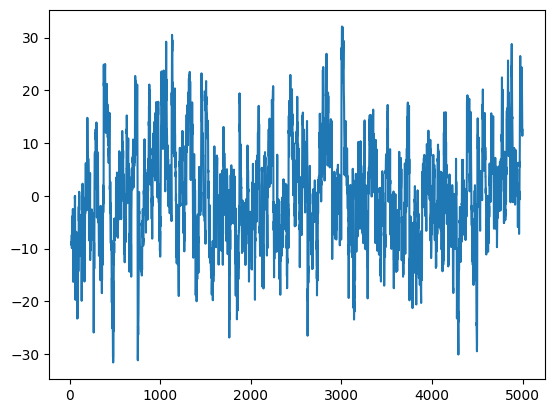

In [5]:
rsi = fc_rsi.rsi(df_icici, lookback=20)
plt.plot(rsi.values[:5000] - 50)

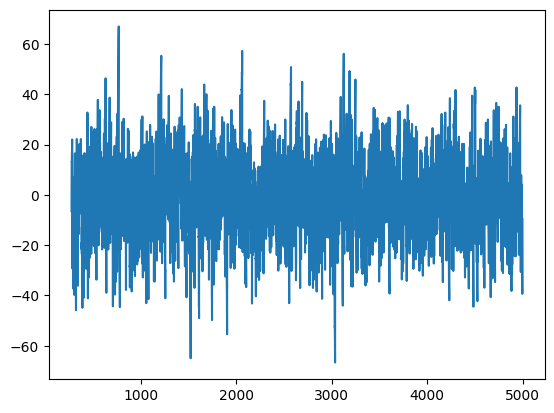

In [6]:
drsi = fc_drsi.detrended_rsi(df_icici, short_length=2, long_length=20, length=252)
plt.plot(drsi.values[:5000])


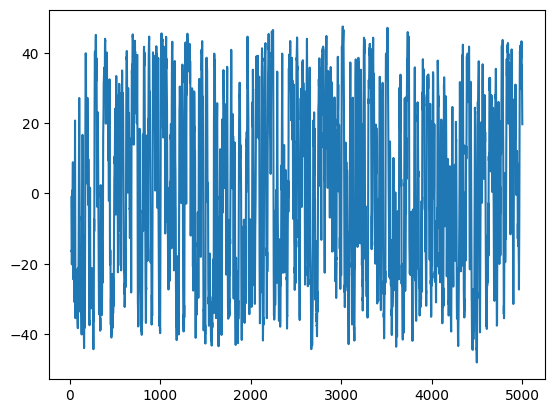

In [7]:
stoch = fc_stoch.stochastic(df_icici, lookback=20, n_to_smooth=1)
plt.plot(stoch.values[:5000] - 50)


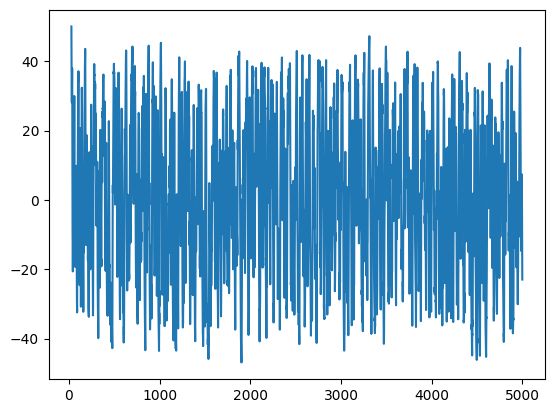

In [8]:
stoch_rsi = fc_stoch_rsi.stochastic_rsi(
  df_icici, rsi_lookback=14, stoch_lookback=14, n_to_smooth=10
)
plt.plot(stoch_rsi.values[:5000] - 50)

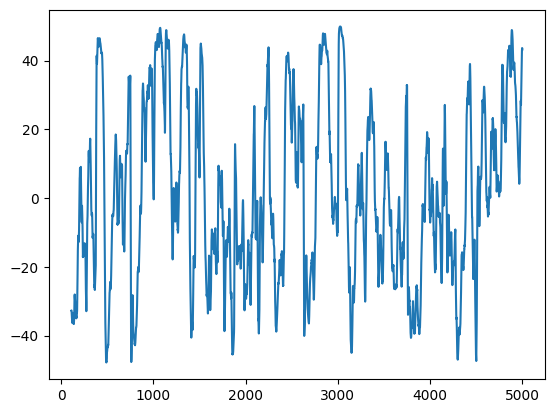

In [9]:
ma_diff = fc_ma_diff.ma_diff(df_icici, short_length=10, long_length=100, lag=10)
plt.plot(ma_diff.values[:5000])